In [1]:
# import modules%pylab inline
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import librosa
import numpy as np
import pandas as pd
from librosa import display

In [2]:
x, sr = librosa.load('Tstock.wav')
print x.shape, sr

(42309,) 22050


In [3]:
ipd.Audio(x, rate=sr)

In [4]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length)
print onset_frames # frame numbers of estimated onsets

[ 3 11 16 21 25 28 31 36 42 45 50 53 57 60 64 69 72 76 81]


In [5]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
print onset_times

[0.06965986 0.2554195  0.37151927 0.48761905 0.58049887 0.65015873
 0.71981859 0.83591837 0.9752381  1.04489796 1.16099773 1.2306576
 1.32353741 1.39319728 1.4860771  1.60217687 1.67183673 1.76471655
 1.88081633]


In [6]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
print onset_samples

[ 1536  5632  8192 10752 12800 14336 15872 18432 21504 23040 25600 27136
 29184 30720 32768 35328 36864 38912 41472]


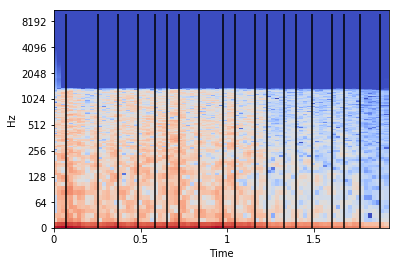

In [7]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [8]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
    return numpy.concatenate([
        numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [9]:

concatenated_signal = concatenate_segments(x, onset_samples, 0.500)

In [10]:
ipd.Audio(concatenated_signal, rate=sr)

In [11]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length, backtrack=True)

In [12]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

In [13]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

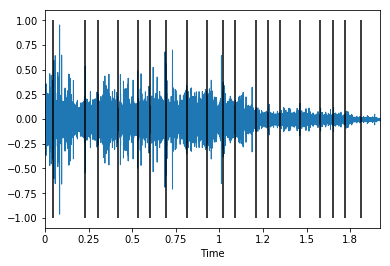

In [14]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

In [15]:
data = pd.read_csv('daily_t.csv')

In [16]:
data

,timestamp,open,high,low,close,volume
0,2019-05-09,30.2700,30.390,30.1250,30.1701,9492471
1,2019-05-08,30.3900,30.500,30.1700,30.3000,24618886
2,2019-05-07,30.5200,30.590,30.2800,30.5300,25771202
3,2019-05-06,30.4600,30.640,30.3800,30.5900,25182044
4,2019-05-03,30.6600,30.790,30.5700,30.7000,28225621
5,2019-05-02,30.9600,31.010,30.5900,30.6200,29711544
6,2019-05-01,31.0500,31.210,30.7800,30.7900,27046955
7,2019-04-30,30.9400,31.135,30.7600,30.9600,35001292
8,2019-04-29,30.9100,31.305,30.8200,30.8800,31762671
9,2019-04-26,30.4700,30.960,30.2800,30.6800,35191837


In [17]:
close = data["close"]

In [18]:
close

0       30.1701
1       30.3000
2       30.5300
3       30.5900
4       30.7000
5       30.6200
6       30.7900
7       30.9600
8       30.8800
9       30.6800
10      30.3400
11      30.7900
12      32.1000
13      32.0800
14      32.0300
15      31.9500
16      32.2500
17      32.0200
18      32.2000
19      32.2000
20      31.8800
21      31.7500
22      32.3900
23      32.3500
24      31.9800
25      31.8700
26      31.6300
27      31.9500
28      31.3600
29      31.0100
         ...   
5342    76.5000
5343    76.5600
5344    76.3800
5345    77.3800
5346    77.2500
5347    77.6900
5348    76.9400
5349    78.5000
5350    78.5600
5351    78.6300
5352    77.7500
5353    78.2500
5354    77.0000
5355    77.8100
5356    75.9400
5357    75.6300
5358    76.9400
5359    75.0600
5360    75.5600
5361    74.2500
5362    73.9400
5363    73.6300
5364    73.3100
5365    72.6300
5366    71.5600
5367    72.2500
5368    72.9400
5369    72.5000
5370    72.8100
5371    74.9400
Name: close, Length: 537

In [19]:
volume = data["volume"]
volume

0        9492471
1       24618886
2       25771202
3       25182044
4       28225621
5       29711544
6       27046955
7       35001292
8       31762671
9       35191837
10      44021278
11      72249253
12      31674988
13      22239129
14      23317482
15      22364832
16      21701920
17      19463704
18      26021137
19      24930873
20      20385934
21      26779029
22      37251965
23      39928718
24      28211971
25      28779967
26      31945765
27      37773767
28      31606530
29      26996419
          ...   
5342      990300
5343     1378600
5344     1015000
5345     1203900
5346      832200
5347     1019700
5348     1298200
5349     1018500
5350     1413400
5351     1654000
5352     1453900
5353     2037300
5354     1731300
5355     1968800
5356     1069800
5357     1454700
5358     1259400
5359      916100
5360     1397100
5361     1473200
5362     1357400
5363     1210000
5364     1320500
5365     1603000
5366     1637600
5367     1847000
5368     2019400
5369     29079

In [20]:
volume.max()

195082730

In [21]:
time = data["timestamp"]
time

0       2019-05-09
1       2019-05-08
2       2019-05-07
3       2019-05-06
4       2019-05-03
5       2019-05-02
6       2019-05-01
7       2019-04-30
8       2019-04-29
9       2019-04-26
10      2019-04-25
11      2019-04-24
12      2019-04-23
13      2019-04-22
14      2019-04-18
15      2019-04-17
16      2019-04-16
17      2019-04-15
18      2019-04-12
19      2019-04-11
20      2019-04-10
21      2019-04-09
22      2019-04-08
23      2019-04-05
24      2019-04-04
25      2019-04-03
26      2019-04-02
27      2019-04-01
28      2019-03-29
29      2019-03-28
           ...    
5342    1998-02-13
5343    1998-02-12
5344    1998-02-11
5345    1998-02-10
5346    1998-02-09
5347    1998-02-06
5348    1998-02-05
5349    1998-02-04
5350    1998-02-03
5351    1998-02-02
5352    1998-01-30
5353    1998-01-29
5354    1998-01-28
5355    1998-01-27
5356    1998-01-26
5357    1998-01-23
5358    1998-01-22
5359    1998-01-21
5360    1998-01-20
5361    1998-01-16
5362    1998-01-15
5363    1998

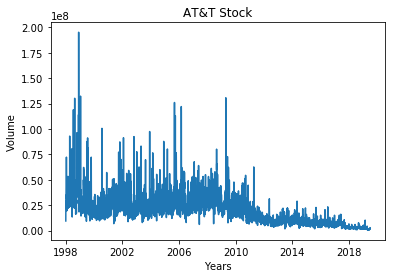

In [29]:
plt.plot(volume)

plt.xticks([tick*1000 for tick in range(0,6)],[z for z in range(1998,2019,4)])

plt.title("AT&T Stock")

plt.xlabel('Years')
plt.ylabel('Volume')

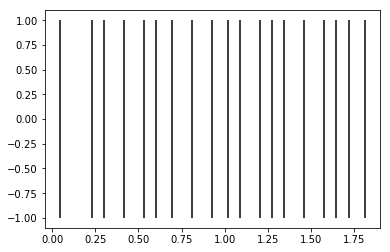

In [23]:
plt.vlines(onset_times, -1, 1, color='k')

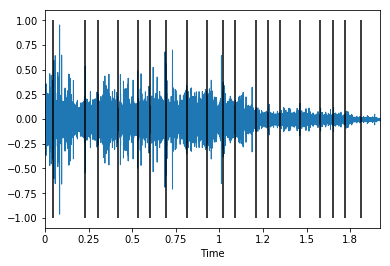

In [24]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

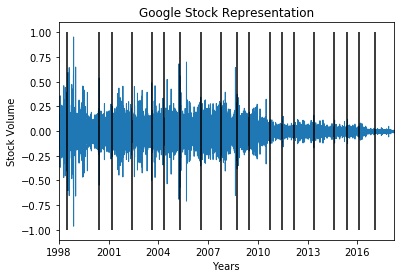

In [25]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.title("Google Stock Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume')

#plt.yticks(list(range(100, 0,-20)))

In [26]:
[z for z in range(1998,2019,3)]

[1998, 2001, 2004, 2007, 2010, 2013, 2016]

In [27]:
[tick*.0714 for tick in range(0,7)]

[0.0, 0.0714, 0.1428, 0.2142, 0.2856, 0.35700000000000004, 0.4284]

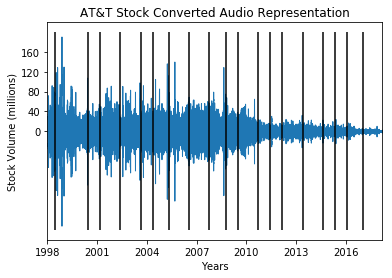

In [28]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

#plt.yticks(100, 1000, 500)

#plt.yticks(np.arange(0, 82, step=10))

plt.yticks([tick*.2 for tick in range(0,5)],[z for z in range(0,195,40)])

#max volume of 195,082,730

plt.title("AT&T Stock Converted Audio Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume (millions)')

#plt.yticks(list(range(100, 0,-20)))

